2017-10811 물리천문학부 곽하늘 전산천문학 과제 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#### 1. Isothermal Sphere

#### (a)

$$ u= \sum_{n=0}^{\infty} a_n \xi^n$$

위와 같이 두고 문제를 풀자. 문제의 방정식을 정리하면 다음과 같다. 

$$ \dfrac{1}{\xi^2}\sum_{n=1}^{\infty}{n(n+1)a_n \xi^{n}} = e^{-u} $$

초기조건인 $u(0)=u'(0)=0$ 을 이용하면 자연히 $a_0 = a_1 = 0$ 임을 알 수 있다. 따라서 식을 한 번 더 정리하면 

$$ \sum_{n=0}^{\infty}{(n+2)(n+3)a_{n+2}{\xi^n}} = e^{-u} $$

이 식을 $n$번 미분하고 $\xi = 0$ 을 대입하면 $a_{n+2}$ 을 얻을 수 있다. 우변을 미분하고 $\xi=0$ 을 대입할 때는 이미 전 단계에서 구한 계수들만 가지고 표현이 가능하므로 이를 반복하면 $a_n$ 들을 찾을 수 있다. 

$\therefore a_0 = 0, a_1 = 0, a_2 = 1/6, a_3 = 0, a_4 = -1/120$

#### (b)

$v = u', u = u$ 로 놓고 연립 일차 미분방정식으로 바꿀 수 있다.

그러면 $u' = v, v' = -\dfrac{2}{\xi} + e^{-u}$ 가 된다.

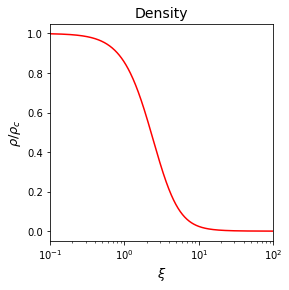

In [2]:
def derv(var, xi): # var[0] = u, var[1] = v
    du = var[1]
    dv = -2/xi*var[1] + np.exp(-var[0])
    return du, dv

EPS = 1e-3
num = 1001
xi = np.logspace(np.log10(EPS), 2, num) # 0 대신 1e-3을 시작점으로 하자.
# (a) 를 이용하여, EPS = 1e-3에서의 초기조건을 계산하자. 
u0 = 1/6*(EPS**2)
v0 = 1/3*EPS
IC = [u0, v0]
array = odeint(derv, IC, xi)
u, v = array[:, 0], array[:, 1]
rho = np.exp(-u)

fig1b = plt.figure(1, figsize = (4, 4))
plt.plot(xi, rho, 'r-')
plt.xscale('log')
plt.xlim([1e-1, 1e2])
plt.xlabel(r'$\xi$', fontsize=13)
plt.ylabel(r'$\rho/\rho_c$', fontsize=13)
# plt.yscale('log')
plt.title('Density', fontsize=14)
plt.show()

#### (c)

In [3]:
def trap(f, x): # f는 함수를 나타내는 배열, x는 적분할 x값들
    # uniform space가 아니라 주어진 x에 대해서 적분하는 함수
    tot = 0
    for i in range(0, len(x)-1):
        tot += 0.5*(x[i+1] - x[i])*(f[i] + f[i+1])
    return tot
    
def m(xi):
    XI = np.logspace(np.log10(EPS), np.log10(xi), num)
    u = odeint(derv, IC, XI)[:, 0]
    # XI의 각 원소들에 해당하는 u값을 계산함 
    func = (XI**2)*np.exp(-u)
    # 위 trap 함수의 return 은 func을 [0, xi] 에서 적분한 값
    m = 0.5/(np.sqrt(np.pi))*trap(func, XI) + 1/3*(EPS)**3
    # 맨 뒤의 1/3*(EPS)**2 항은 작은 XI 에서 빠졌던 값
    return m

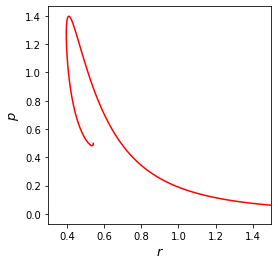

In [4]:
# 5초만 기다려 주세요!

r = 1/(xi*v)

M = np.zeros(len(xi))
for i in range(len(xi)):
    M[i] = m(xi[i])

p = (M**2)*np.exp(-u)

fig1c = plt.figure(1, figsize = (4, 4))
plt.plot(r, p, 'r-')
plt.xlim([0.3, 1.5])
# plt.xscale('log')
plt.xlabel(r'$r$', fontsize=13)
plt.ylabel(r'$p$', fontsize=13)
plt.show()

$${\xi}^2 e^{-u} = \dfrac{d}{d\xi}\left( {\xi}^2\dfrac{du}{d\xi} \right)$$

이므로 식 (2)의 적분은 다음과 같이 해석적으로 할 수 있다. 

$$m(\xi) = \dfrac{1}{\sqrt{4\pi}} \int_{0}^{\xi} \xi'^2 e^{-u(\xi')} dx = \dfrac{1}{\sqrt{4 \pi}} \left( \xi^2 \dfrac{du}{d \xi} \right) $$

$p$ 를 미분하여 $0$이 되는 지점을 찾자. 

$$\dfrac{dp}{d\xi} = \left( 2m \dfrac{dm}{d\xi} - m^2 \dfrac{du}{d\xi} \right) e^{-u} = 0\;\;\;(1)$$

이므로 $ 2 \dfrac{dm}{d\xi} = m \dfrac{du}{d\xi},\; \dfrac{dm}{d\xi} = \dfrac{1}{\sqrt{4\pi}}\xi^2 e^{-u} $ 임을 이용하여 정리하면 $ \left( \dfrac{du}{d\xi} \right)^2 = 2e^{-u}$ 이다. 

따라서 $v^2 = 2e^{-u}$ 인 $\xi$를 구하자. (두 번째 방법)

또는 $p$ 가 maximum이 되는 $r$ 을 바로 구할 수도 있다. (첫 번째 방법)

직접 찾는 방법
p가 최대값이 되는 xi: 6.456542290346556
p가 최대값이 되는 r : 0.4106815002807819


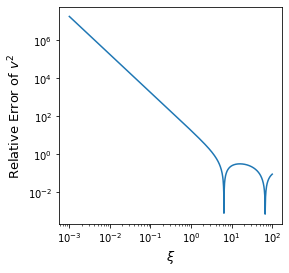

In [5]:
# 직접 찾는 방법
index = np.where(p==max(p))[0][0]
print('직접 찾는 방법')
print(f'p가 최대값이 되는 xi: {xi[index]}')
print(f'p가 최대값이 되는 r : {r[index]}')

temp = abs((v**2-2*np.exp(-u))/v**2) # relative error

fig_temp = plt.figure(3, figsize = (4, 4))
plt.plot(xi, temp)
plt.xlabel(r'$\xi$', fontsize=13)
plt.ylabel(r'Relative Error of $v^2$', fontsize=13)
plt.loglog()
plt.show()

그림에서 알 수 있듯이, 직접 $p$ 의 최대값을 구했을 때에 해당하는 값인 $\xi \approx 6.46$ 에 해당하는 점에서 극소값을 갖는다. 하지만 $100$ 근처에서 또 극소값이 생기는데 이는 식 (1)을 통해 해석할 수 있다. 식 (1)의 괄호 안의 항이 정확히 $0$은 아니지만 큰 $\xi$ 에서 $0$ 으로 점근하기 때문에 특정한 $\xi$ 에서 또 한 번 작은 값을 가지는 것이다. 

In [6]:
# Hint 사용한 방법
idx = np.where(xi<10)
xi_new = xi[idx]
temp_new = temp[idx]
p_new = p[idx]
minidx = np.where(temp_new==min(temp_new))[0][0]

print('직접 찾는 방법')
print(f'p가 최대값이 되는 xi: {xi[index]}')
print(f'p가 최대값이 되는 r : {r[index]}\n')

print('Hint 사용한 방법')
print(f'p가 최대값이 되는 xi: {xi[minidx]}')
print(f'p가 최대값이 되는 r : {r[minidx]}')

print('\n같은 값을 가지는 것을 볼 수 있다.')

직접 찾는 방법
p가 최대값이 되는 xi: 6.456542290346556
p가 최대값이 되는 r : 0.4106815002807819

Hint 사용한 방법
p가 최대값이 되는 xi: 6.456542290346556
p가 최대값이 되는 r : 0.4106815002807819

같은 값을 가지는 것을 볼 수 있다.


#### 2. Cosmic Expansion

#### (a)

$H = \dfrac{1}{a}\dfrac{da}{dt} $ 이므로 $\left( \dfrac{1}{a}\dfrac{da}{dt}  \right)^2 = \dfrac{H_0^2}{a^3}$

즉 $\dfrac{da}{dt} = {\dfrac{H_0}{\sqrt{a}}}$ 이므로 이를 numerical하게 풀 수도 있고 exact한 analytic solution을 구할 수도 있다. 

따라서 $a(t) = \left( \dfrac{3}{2}H_0 t \right)^{2/3}$

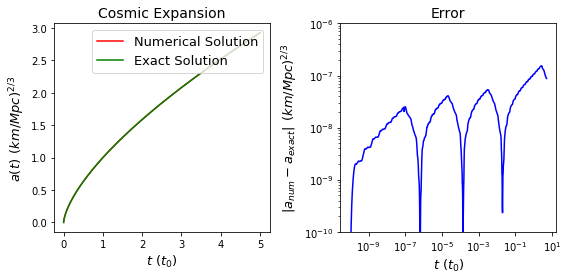

In [20]:
# (1) 을 numerical 하게 푸는 과정 

H0 = 71 # km/s/Mpc

def a_true(t): 
    return (1.5*H0*t)**(2/3)

def dadt(a, t=None):
    return H0/np.sqrt(a)

t0 = 2/(3*H0)  
EPS = 1e-10*t0 # 초기조건을 계산할 시각

t1, t2, num = EPS, 5*t0, 1001
a0 = (1.5*H0*t1)**(2/3) # 임의로 지정한 initial condition

t = np.logspace(np.log10(t1), np.log10(t2), num)
a_numerical = odeint(dadt, a0, t)[:, 0]
a_exact = a_true(t)
err = abs(a_numerical-a_exact)

fig2 = plt.figure(2, figsize = (8, 4))
plt.subplot(121)
plt.plot(t/t0, a_numerical, 'r-', label='Numerical Solution')
plt.plot(t/t0, a_exact, 'g-', label='Exact Solution')
plt.xlabel('$t$ $(t_0)$', fontsize=13)
plt.ylabel('$a(t)\;\,(km/Mpc)^{2/3}$', fontsize=13)
plt.title('Cosmic Expansion', fontsize=14)
plt.legend(loc=1, fontsize=13)
plt.subplot(122)
plt.plot(t/t0, err, 'b-')
plt.xlabel('$t$ $(t_0)$', fontsize=13)
plt.ylabel('$|a_{num}-a_{exact}|\;\,(km/Mpc)^{2/3}$', fontsize=13)
plt.title('Error', fontsize=14)
plt.ylim([1e-10, 1e-6])
plt.loglog()
plt.tight_layout()
plt.show()

#### (b)

$\left( \dfrac{1}{a}\dfrac{da}{dt} \right)^2 = H_0^2 \left[ (3\times10^{-5})a^{-4} + 0.27a^{-3} + 0.73 \right] $ 이므로 이를 풀면 된다.

초기조건을 설정하자. 문제의 식 (5)에 의해, 작은 $t$ 에서는 $\left(\dfrac{1}{a}\dfrac{da}{dt}\right)^2 = H_0^2 \Omega_R a^{-4}$ 이다. 이를 풀면 $a(t) = \sqrt{2H_0t \sqrt{\Omega_R}} $ 이다. $(t \ll t_0)$

In [21]:
OmegaR, OmegaM, Omegak, OmegaL = 3e-5, 0.27, 0, 0.73

def dadt1(a, t=None):
    return H0*a*np.sqrt(OmegaR*(a**(-4))+OmegaM*(a**(-3))+\
                        Omegak*(a**(-2))+OmegaL)

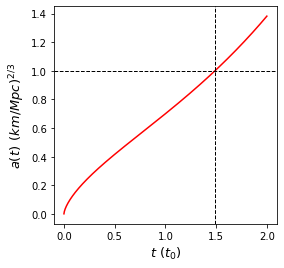

t0: 9.171Gyr

우주의 나이: 13.646Gyr


In [28]:
t1 = EPS
t2 = 2*t0

t = np.linspace(t1, t2, num)

a01 = np.sqrt(2*H0*(t1)*np.sqrt(OmegaR))
a1 = odeint(dadt1, a01, t)

idx = np.where(abs(a1-1)<1e-3)[0][0]

fig2b = plt.figure(2, figsize = (4, 4))
plt.plot(t/t0, a1, 'r-')
plt.xlabel('$t$ $(t_0)$', fontsize=13)
plt.ylabel('$a(t)\;\,(km/Mpc)^{2/3}$', fontsize=13)
# plt.yscale('log')
plt.axhline(y=1, color='k', lw=1, ls='--')
plt.axvline(x=t[idx]/t0, color='k', lw=1, ls='--')
plt.show()

h0 = H0*1000/1e6/3.08e16
T0 = 2/(3*h0)/365/24/3600/1e9

print(f't0: {T0:5.3f}Gyr\n')
print(f'우주의 나이: {t[idx]/t0*T0:5.3f}Gyr')

#### (c)

위 그래프에서 볼수 있듯이 변곡점이 생긴다. 즉 우주는 감속 팽창하다가 다시 가속 팽창한다. 변곡점은 $\dfrac{da}{dt}$ 의 변화를 통해 구할 수 있다. 

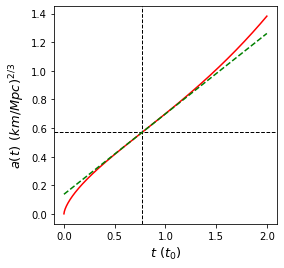

Critical time: 7.061Gyr

a(t): 0.5694654349708416

Hubble parameter z: 0.756


In [38]:
array2b = dadt1(a1)

for i in range(len(array2b)):
    if array2b[i]<array2b[i+1]:
        idx2b = i
        break 
        
fig2c = plt.figure(2, figsize = (4, 4))
plt.plot(t/t0, a1, 'r-')
plt.xlabel('$t$ $(t_0)$', fontsize=13)
plt.ylabel('$a(t)\;\,(km/Mpc)^{2/3}$', fontsize=13)
# plt.yscale('log')
plt.axvline(x=t[idx2b]/t0, color='k', ls='--', lw=1)
plt.axhline(y=a1[idx2b], color='k', ls='--', lw=1)
plt.plot(t/t0, array2b[idx2b]*(t-t[idx2b])+a1[idx2b], 'g--')
plt.show()

A = a1[idx2b][0]

print(f'Critical time: {t[idx2b]/t0*T0:5.3f}Gyr\n')
print(f'a(t): {A}\n')
print(f'Hubble parameter z: {1/A-1:5.3f}')

#### 3. 

#### (a)

Leapfrog를 사용하자.

In [4]:
m1, m2 = 1, 0.5

def derv3(r1, r2, t=None):
    # r1은 x1, y1을 성분으로 갖는 array
    x1, y1 = r1
    x2, y2 = r2
    R = ((x1-x2)**2+(y1-y2)**2)**(1.5)
    ax1 = -m2*(x1-x2)/R
    ay1 = -m2*(y1-y2)/R
    ax2 = -m1*(x2-x1)/R
    ay2 = -m1*(y2-y1)/R
    return np.array([[ax1, ay1], [ax2, ay2]])

def leap(acc, r0, v0, t):
    N = len(t)
    h = (t[-1]-t[1])/(N-1)
    hh = 0.5*h
    r1 = np.zeros((N, 2))
    r2 = np.zeros((N, 2))
    r1[0] = r0[0] # 별 1의 x, y 좌표
    r2[0] = r0[1] # 별 2의 x, y 좌표
    v1 = np.zeros((N, 2))
    v2 = np.zeros((N, 2))
    v1[0] = v0[0] # 별 1의 x, y 속도
    v2[0] = v0[1] # 별 2의 x, y 속도
    array_i = acc(r1[0], r2[0])
    for i in range(N-1):
        temp1 = v1[i] + hh*array_i[0] # 별 1
        temp2 = v2[i] + hh*array_i[1] # 별 2 
        r1[i+1] = r1[i] + h*temp1
        r2[i+1] = r2[i] + h*temp2
        array_i = acc(r1[i+1], r2[i+1])
        v1[i+1] = temp1 + hh*array_i[0]
        v2[i+1] = temp2 + hh*array_i[1]
    return r1, r2, v1, v2

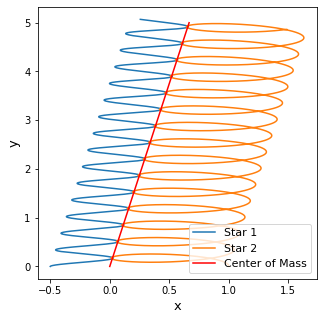

In [5]:
t1, t2 = 0, 50
num = 200001 # 몇 초만 기다려 주세요!
t = np.linspace(t1, t2, num)

r0 = np.array([[-0.5, 0], [1, 0]])
v0 = np.array([[0.01, 0.05], [0.02, 0.2]])

r1, r2, v1, v2 = leap(derv3, r0, v0, t)
R = (m1*r1+m2*r2)/(m1+m2)

fig3 = plt.figure(3, figsize = (5, 5))
plt.plot(r1[:, 0], r1[:, 1], label='Star 1')
plt.plot(r2[:, 0], r2[:, 1], label='Star 2')
plt.plot(R[:, 0], R[:, 1], 'r-', label='Center of Mass')
plt.legend(loc='lower right', fontsize=11)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.show()

#### (b)

위의 그림에 나타낸 것처럼, 질량중심은 일정한 속도로 이동한다. 두 별은 서로의 주위를 공전하며 이동하지만 질량중심의 속도는 변하지 않는다. 

#### (c)

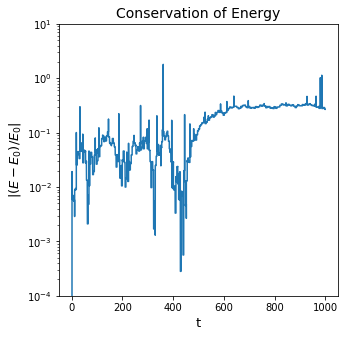

In [7]:
t1, t2 = 0, 1000
num = 1000001 # 30초만 기다려 주세요!
t = np.linspace(t1, t2, num)

R0 = np.sqrt((r0[0, 0]-r0[1, 0])**2 + (r0[0, 1]-r0[1, 1])**2)
V01 = v0[0, 0]**2 + v0[0, 1]**2
V02 = v0[1, 0]**2 + v0[1, 1]**2

r1, r2, v1, v2 = leap(derv3, r0, v0, t)
x1, y1 = r1[:, 0], r1[:, 1]
x2, y2 = r2[:, 0], r2[:, 1]
vx1, vy1 = v1[:, 0], v1[:, 1]
vx2, vy2 = v2[:, 0], v2[:, 1]
R = np.sqrt((x1-x2)**2 + (y1-y2)**2)
V1 = vx1**2 + vy1**2
V2 = vx2**2 + vy2**2

E = 0.5*m1*V1 + 0.5*m2*V2 - m1*m2/R
E0 = 0.5*m1*V01 + 0.5*m2*V02 - m1*m2/R0
err = abs((E-E0)/E0)

fig3 = plt.figure(3, figsize = (5, 5))
plt.plot(t[::100], err[::100]) # 다 그리면 너무 많아서 일부만 그림
plt.xlabel('t', fontsize=13)
plt.ylabel('$|(E-E_0)/E_0|$', fontsize=13)
plt.yscale('log')
plt.ylim([1e-4, 1e1])
plt.title('Conservation of Energy', fontsize=14)
plt.show()

시간이 굉장히 길기 때문에, 많은 수의 구간을 도입해도 에너지의 오차가 비교적 큰 것을 알 수 있다. 하지만 대부분의 경우 relative error가 1보다 작다. 또한 $t = 500$ 이 되기 전에는 오차가 작지만 $t = 500$ 을 넘으면 오차가 커진다. 하지만 relative error가 시간에 따라 일정하기 때문에 Leapfrog integrator는 에너지 보존 측면에서 좋은 알고리즘이라고 할 수 있다. 

#### 4. 

다음과 같이 연립 1계 미분방정식으로 변형할 수 있다. $\lambda$ 대신 $\xi$ 를 쓰자.

$u = y,\;v = y'$ 이라 하면 

$u' = v, \;v' = (\left| x \right| - \xi) u$

In [8]:
def derv4(y, x, xi):
    du = y[1]
    dv = (abs(x)-xi)*y[0]
    return du, dv

[ 2.3390493   2.3390493   2.3390493   4.16212509  4.16212509  6.16659622
  6.16659622  8.89079638  8.89079638 12.41921232 12.41921232 59.35797376]

Sorted XI: [ 2.3390493   4.16212509  6.16659622  8.89079638 12.41921232]


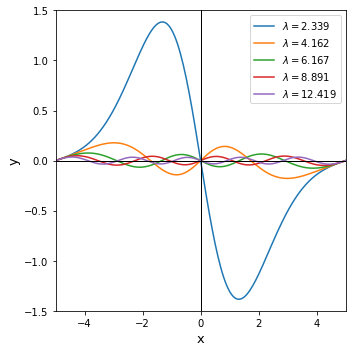

In [9]:
num = 201
x = np.linspace(-5, 0, num)
y0 = np.array([0, 0.1]) # IC
Y = 0 # y(0) = 0 이어야 한다는 조건
tol = 1e-10

# xi < 0이면 y는 지수함수 꼴이 되고, 초기조건에서 y(-5) = 0, y'(-5) > 0 
# 이기 때문에 x = 0에서 0이 될 수 없다. 따라서 xi는 최소한 0 이상이다. 

N = 12
XI = np.zeros(N)
dist = 1

for i in range(N):
    count = 0
    err = 1
    xi1, xi2 = i, i+1 # 각 정수 사이에서 구해 보자. 
    y1 = odeint(derv4, y0, x, args=(xi1,))[:, 0]
    # trial value 중 하나로 y(0) 구하기 
    while err >= tol:
        count += 1
        array = odeint(derv4, y0, x, args=(xi2,))
        y2 = array[:, 0]
        xi = (xi2-xi1)/(y2[-1]-y1[-1])*(Y-y1[-1]) + xi1
        err = abs(y2[-1]-Y)
        y1 = y2 # 새로운 y2를 y1에 대입 
        xi1 = xi2 # xi2를 xi1에 대입
        xi2 = xi # 새롭게 얻은 xi를 xi2에 대입
        if count > 100: 
            print("Loop number is larger than 100")
            break # 혹시 모를 무한루프 방지
    XI[i] = xi
    

XI.sort()
print(XI)
XI = np.delete(XI, [1, 2, 4, 6, 8, 10, 11]) # 겹치지 않게 하기 
print(f"\nSorted XI: {XI}")

X = np.linspace(-5, 5, num)

fig4 = plt.figure(4, figsize = (5, 5))
for i in range(len(XI)):
    plt.plot(X, odeint(derv4, y0, X, args=(XI[i],))[:, 0], \
             label=f'$\lambda={XI[i]:.3f}$')
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.axis([-5, 5, -1.5, 1.5])
plt.axvline(x=0, lw=1, color='k')
plt.axhline(y=0, lw=1, color='k')
plt.legend(loc=1)
plt.tight_layout()
plt.show()

# 모두 원점을 지나는 것을 볼 수 있다. 